##### Importing the required libraries

In [41]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

##### XNOR data

In [42]:
# Features
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

# Target
y = np.array([1, 0, 0, 1])

##### Ploting the XNOR data

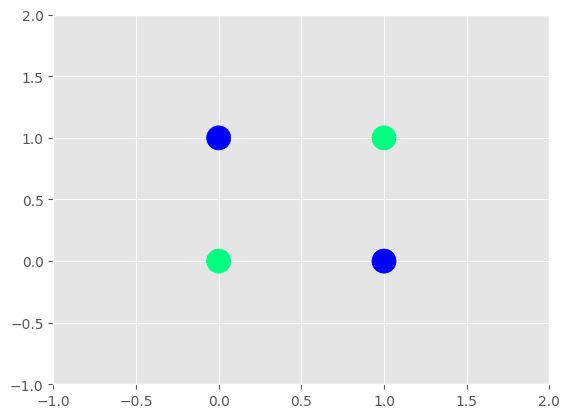

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=300, cmap='winter')
plt.ylim(-1,2)
plt.xlim(-1,2)
plt.show()

##### Randomly initializing the weights and bias

In [44]:
parameters = np.random.rand(3,3)
parameters

array([[0.98556959, 0.75135694, 0.31771713],
       [0.32154989, 0.0412701 , 0.22198753],
       [0.41174757, 0.02234808, 0.72692289]])

##### Sigmoid Activation Function

In [45]:
def sigmoid(z):
  '''
  net input is passed into the sigmoid function and the output will 
  always be between 0 and 1
  '''
  return 1/(1+np.exp(-z))

In [46]:
# plotting the decision boundary
def plot(epoch):

  # node 1 (o_11)
  m1 = -(parameters[0][1]/parameters[0][2])
  c1 = -(parameters[0][0]/parameters[0][2])
  x_input1 = np.linspace(-3, 3, 100)
  y_input1 = m1 * x_input1 + c1

  # node 2 (o_12)
  m2 = -(parameters[1][1]/parameters[1][2])
  c2 = -(parameters[1][0]/parameters[1][2])
  x_input2 = np.linspace(-3, 3, 100)
  y_input2 = m2 * x_input2 + c2

  plt.figure(figsize=(8, 4))
  plt.plot(x_input1, y_input1, color='darkred', linewidth=3) # line created by o_11
  plt.plot(x_input2, y_input2, color='darkred', linewidth=3) # line created by o_12
  plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=200)
  plt.suptitle(f'epoch {epoch+1}')
  plt.ylim(-1, 2)
  plt.xlim(-1, 2)

  plt.show()

##### Training the model

epoch : 1000 ;       loss 0.694187056895106
epoch : 2000 ;       loss 0.6928871468785239
epoch : 3000 ;       loss 0.6902403369258553
epoch : 4000 ;       loss 0.6845723215859955
epoch : 5000 ;       loss 0.6718213301855217
epoch : 6000 ;       loss 0.6438580096037158
epoch : 7000 ;       loss 0.5972360034851969
epoch : 8000 ;       loss 0.5451598478352104
epoch : 9000 ;       loss 0.490124061332358
epoch : 10000 ;       loss 0.4035389337283484
epoch : 11000 ;       loss 0.2761058205279585
epoch : 12000 ;       loss 0.1740268597379257
epoch : 13000 ;       loss 0.11666495444737751
epoch : 14000 ;       loss 0.08483914022843375
epoch : 15000 ;       loss 0.06566790638665745
epoch : 16000 ;       loss 0.05315407262750875


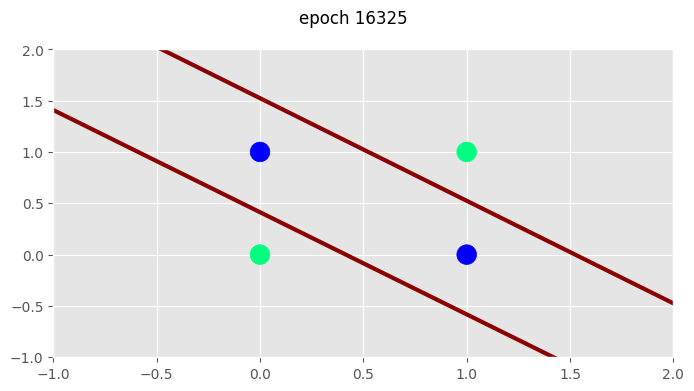

In [47]:
epochs = 50000 
lr = 0.01 

for epoch in range(epochs):
  loss = []
  for i in range(X.shape[0]):

    # forward propagation
    x = np.insert(X[i], 0, 1)
    z_11 = np.dot(x, parameters[0]) # x1*w111 + x2*w121 + b11
    o_11 = sigmoid(z_11) 
    
    z_12 = np.dot(x, parameters[1]) # x1*w112 + x2*w122 + b12
    o_12 = sigmoid(z_12)

    z_21 = np.dot([1, o_11, o_12], parameters[2]) # o11*w211 + o12*w221
    y_hat = sigmoid(z_21)

    # back propagation
    parameters[2][0] = parameters[2][0] + (lr * (y[i] - y_hat))
    parameters[2][1] = parameters[2][1] + (lr * (y[i] - y_hat)*o_11)
    parameters[2][2] = parameters[2][2] + (lr * (y[i] - y_hat)*o_12) 

    parameters[0][0] = parameters[0][0] + (lr * (y[i] - y_hat)*parameters[2][1]*o_11*(1 - o_11))
    parameters[0][1] = parameters[0][1] + (lr * (y[i] - y_hat)*parameters[2][1]*o_11*(1 - o_11)*x[1])
    parameters[0][2] = parameters[0][2] + (lr * (y[i] - y_hat)*parameters[2][1]*o_11*(1 - o_11)*x[2])

    parameters[1][0] = parameters[1][0] + (lr * (y[i] - y_hat)*parameters[2][2]*o_12*(1 - o_12))
    parameters[1][1] = parameters[1][1] + (lr * (y[i] - y_hat)*parameters[2][2]*o_12*(1 - o_12)*x[1])
    parameters[1][2] = parameters[1][2] + (lr * (y[i] - y_hat)*parameters[2][2]*o_12*(1 - o_12)*x[2])

    loss_function = -(y[i]*np.log(y_hat) + (1-y[i])*np.log(1-y_hat)) # log loss
    loss.append(loss_function)
  
  if np.array(loss).mean() > 0.05:

    if (epoch + 1) % 1000 == 0: 
      print(f'epoch : {epoch+1} ;       loss {np.array(loss).mean()}')
  else: break
      
plot(epoch)

##### Updated weights and bias

In [48]:
parameters

array([[-2.47630354,  5.9654415 ,  5.9960691 ],
       [-5.68355833,  3.72722577,  3.73043292],
       [ 3.52518315, -7.84322696,  8.39174543]])

##### Predictions

In [49]:
def predict(x1, x2):
    x = np.array([1, x1, x2])
    z_11 = np.dot(x, parameters[0]) # x1*w111 + x2*w121 + b11
    o_11 = sigmoid(z_11) 

    z_12 = np.dot(x, parameters[1]) # x1*w112 + x2*w122 + b12
    o_12 = sigmoid(z_12)

    z_21 = np.dot([1, o_11, o_12], parameters[2]) # o11*w211 + o12*w221
    y_hat = sigmoid(z_21)

    if y_hat < 0.5:
      return 0
    else:
      return 1

In [50]:
predict(1,1)

1